# Python 3
For this tutorial we'll be using the Iris dataset from sklearn. 

In this notebook we will:
1. Import required modules and dataset
2. Visualize the data in different ways



# Matplotlib

"Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python."

Matplotlib is one of the most popular libraries used to create data vizualizations in Python. It uses an object-oriented API (classes) which we've already worked with when using Pandas

Below is a breakdown of some of the key elements that go into a matplotlib figure

Two main concepts to understand
- A figure is the whole figure and can contain any number of axes (usually at least 1)
- Axes are the "plot" that will contain your title, legend, etc.

<img src="images/mplib_anatomy.png"/>

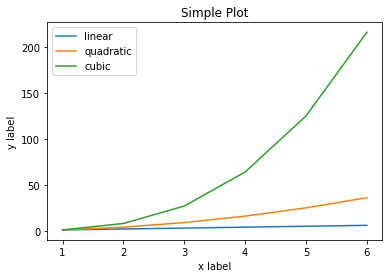

In [198]:
import matplotlib.pyplot as plt
import numpy as np

x  = [1,2,3,4,5,6]

data = np.array(x)
# https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

# Create a figure and an axes.
fig, ax = plt.subplots()  

# Plot some data on the axes.
ax.plot(data, data, label='linear')  

# Plot more data on the axes...
ax.plot(data, data**2, label='quadratic')  

# ... and some more.
ax.plot(data, data**3, label='cubic')  

# Add an x-label to the axes.
ax.set_xlabel('x label')  

# Add a y-label to the axes.
ax.set_ylabel('y label')  

# Add a title to the axes.
ax.set_title("Simple Plot")  

# Add a legend.
ax.legend()  


# Pandas Plotting
Pandas offers a easy way to access Matplotlib to plot the data inside of a DataFrame.

We will go over a few ways to plot some stock data.


In [184]:
#Import Pandas 
import pandas as pd
pd.plotting.register_matplotlib_converters()
%matplotlib inline

print("Setup Complete")


Setup Complete


In [185]:
# Stock data, from 2013 to 2018
df = pd.read_csv('data/all_stocks_5yr.csv', index_col="date", parse_dates=True)


In [188]:
#Take a look at the data
df.head()


,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [189]:
#Create a pivot of the data so we can visualize it
pivot = df.pivot_table(values='close', index=df.index, columns='Name', aggfunc='first')


In [191]:
#Check result of our pivot
pivot.head()


Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,45.08,14.75,78.90,67.8542,36.25,46.89,34.41,73.31,39.12,45.70,...,28.24,37.51,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-11,44.60,14.46,78.39,68.5614,35.85,46.76,34.26,73.07,38.64,46.08,...,28.31,37.46,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,44.62,14.27,78.60,66.8428,35.42,46.96,34.30,73.37,38.89,46.27,...,28.41,37.58,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
2013-02-13,44.75,14.66,78.97,66.7156,35.27,46.64,34.46,73.56,38.81,46.26,...,28.42,37.80,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
2013-02-14,44.58,13.99,78.84,66.6556,36.57,46.77,34.70,73.13,38.61,46.54,...,28.22,38.44,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27


In [51]:
#
pivot_reduced = pivot.loc['2017-01-30':,['AAPL', 'ZION','ABC', 'ABBV']]

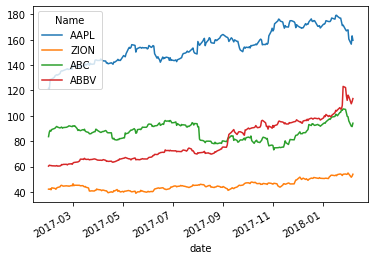

In [260]:
#Plotting data as easy as calling the plot() function
pivot_reduced.plot(kind='line')


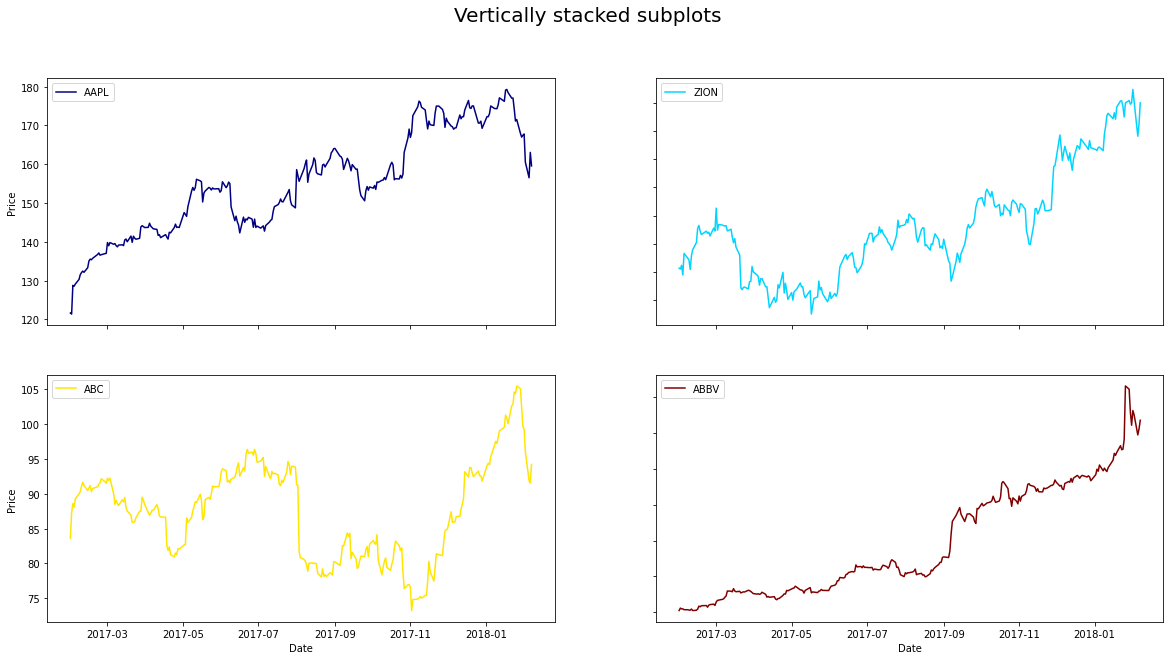

In [256]:
#Define a MPL figure and axes to give us more control of our visual
fig, axs = plt.subplots(2, 2, figsize = (20,10))
fig.suptitle('Vertically stacked subplots', fontsize=20)

#Must specify the axes we want to plot onto, and can specify addicitonal styling parameters with 'colormap'
pivot_reduced.plot(kind='line', subplots=True,  colormap='jet', ax = axs)

#Use a FOR loop to add on the X and Y labels
for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Price')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


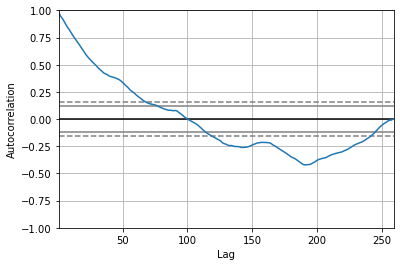

In [165]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(pivot_reduced['AAPL'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC12809BE0>,
      dtype=object)

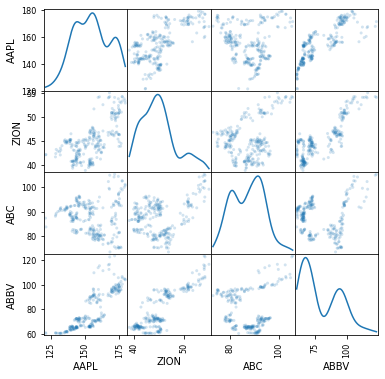

In [265]:
from pandas.plotting import scatter_matrix


scatter_matrix(pivot_reduced, alpha=0.2, figsize=(6, 6), diagonal='kde')

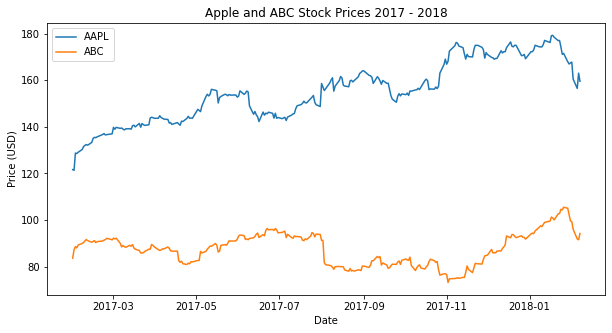

In [264]:
# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Apple and ABC Stock Prices 2017 - 2018")

# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=pivot_reduced['AAPL'], label="AAPL")

# Line chart showing daily global streams of 'Despacito'
sns.lineplot(data=pivot_reduced['ABC'], label="ABC")

# Add label for horizontal axis
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


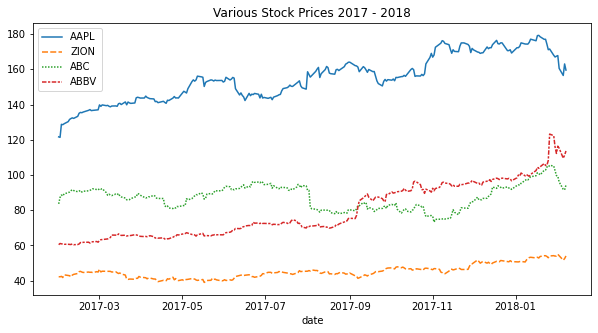

In [61]:
# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Various Stock Prices 2017 - 2018")

sns.lineplot(data=pivot_reduced)

# Barchart
For this tutorial we'll be using the Iris dataset from sklearn. 

In this notebook we will:
1. Import required modules and dataset
2. Visualize the data in different ways



In [101]:
#https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

df = pd.read_csv('data/AB_NYC_2019.csv')

In [102]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [97]:
freq = df['neighbourhood_group'].value_counts()

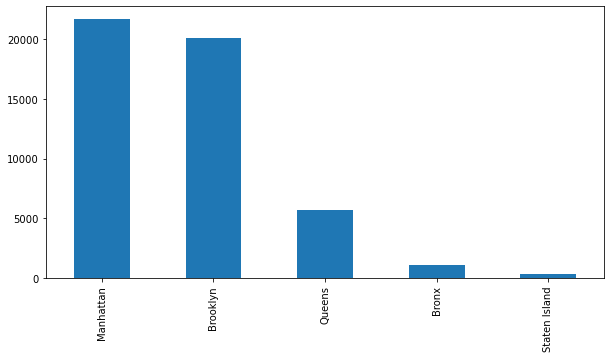

In [98]:
plt.figure(figsize=(10,5))

freq.plot.bar()

In [116]:
pivot = df.pivot_table(values='minimum_nights', index="neighbourhood_group",columns = 'room_type', aggfunc=np.sum)

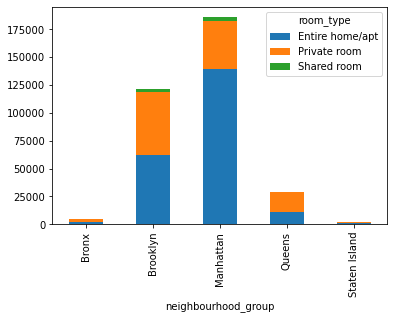

In [118]:
pivot.plot.bar(stacked=True)

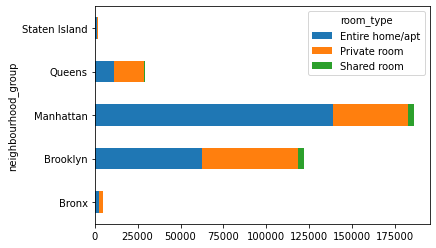

In [120]:
pivot.plot.barh(stacked=True)

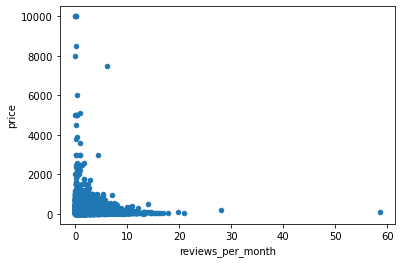

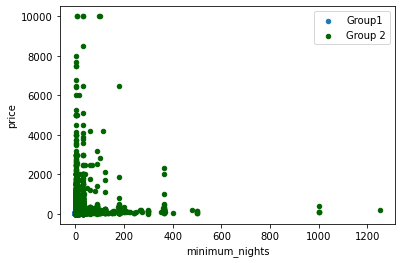

In [140]:
ax = df.plot.scatter(x='reviews_per_month', y='number_of_reviews', label='Group1');
df.plot.scatter(x='minimum_nights', y='price', color='DarkGreen', label='Group 2', ax=ax);
plt.show()

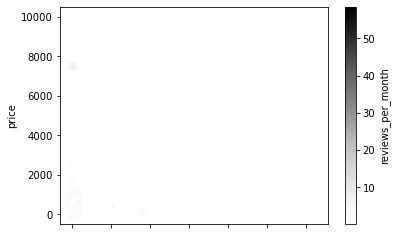

In [142]:
df.plot.scatter(x='minimum_nights', y='price', c='reviews_per_month', s=50)

In [147]:
pivot

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,2258,2516,202
Brooklyn,62433,56126,3202
Manhattan,139108,43477,3248
Queens,11255,17265,838
Staten Island,1098,683,21


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC19517208>,
      dtype=object)

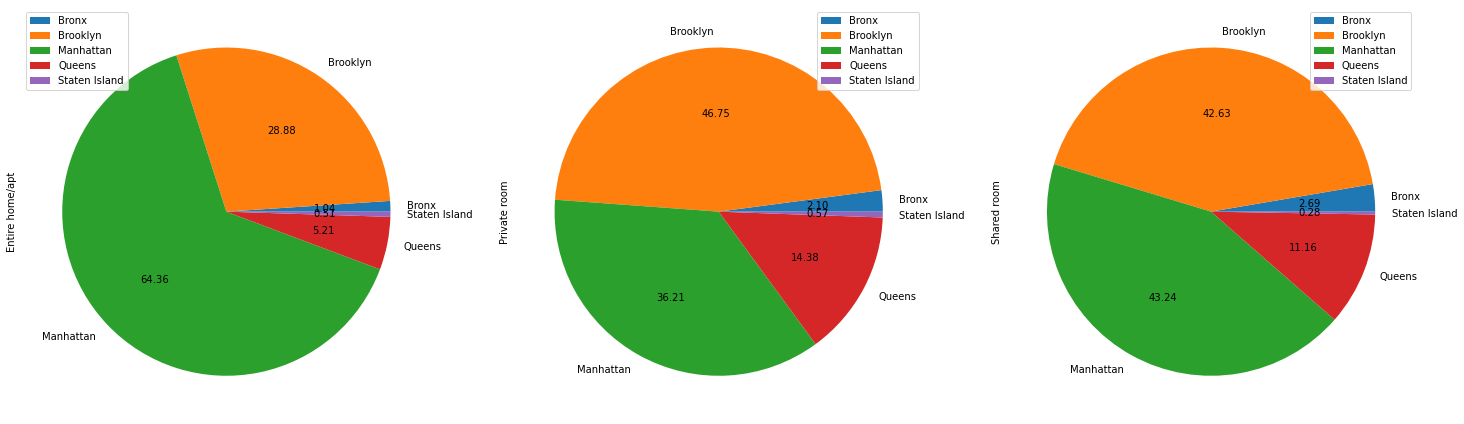

In [162]:
pivot.plot.pie(subplots=True, figsize=(25, 10),  autopct='%.2f')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC21F5BDA0>,
      dtype=object)

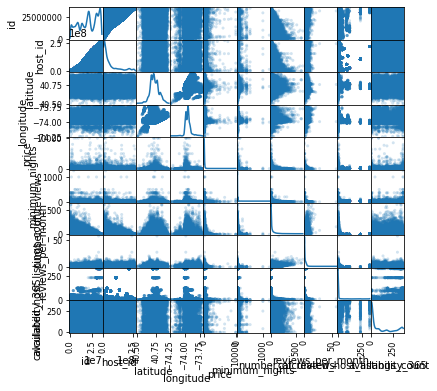

In [160]:
from pandas.plotting import scatter_matrix


scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

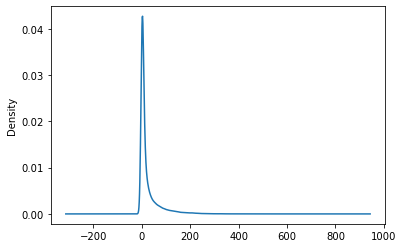

In [164]:
df['number_of_reviews'].plot.kde()

In [48]:
df = df.dropna(axis=0,how='any')

In [49]:
df.shape

(99647, 9)

In [51]:
df.iloc[5]

Unnamed: 0           2.000005e+06
Timestamp            1.540914e+09
Open                 6.264460e+03
High                 6.264460e+03
Low                  6.264450e+03
Close                6.264460e+03
Volume_(BTC)         1.376184e+00
Volume_(Currency)    8.621050e+03
Weighted_Price       6.264460e+03
Name: 5, dtype: float64

In [ ]:

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=flight_data.index, y=flight_data['NK'])

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

In [ ]:
#4. Data Visualization
#Using the plot() function, we can make boxplots by simply specifying the kind of plot

iris_data.plot(kind='box', subplots=True, layout=(2,2), 
               sharex=False, sharey=False)
plt.show()



In [ ]:
# histograms
iris_data.hist()
plt.show()



In [ ]:
#4.2 Multivariate Plots

# scatter plot matrix
scatter_matrix(iris_data)
plt.show()



# Seaborn
For this tutorial we'll be using the Iris dataset from sklearn. 

In this notebook we will:
1. Import required modules and dataset
2. Visualize the data in different ways



In [199]:
import seaborn as sns

# Set the width and height of the figure
plt.figure(figsize=(16,6))

# Line chart showing how FIFA rankings evolved over time 
sns.lineplot(data=fifa_data)



NameError: name 'fifa_data' is not defined

<Figure size 1152x432 with 0 Axes>

In [ ]:
# Line chart showing daily global streams of each song 
sns.lineplot(data=spotify_data)

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Daily Global Streams of Popular Songs in 2017-2018")

# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=spotify_data['Shape of You'], label="Shape of You")

# Line chart showing daily global streams of 'Despacito'
sns.lineplot(data=spotify_data['Despacito'], label="Despacito")

# Add label for horizontal axis
plt.xlabel("Date")

In [ ]:


# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=flight_data.index, y=flight_data['NK'])

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

